In [1]:
import urllib.request
from bs4 import BeautifulSoup as soup
import requests
import re
import pandas as pd
import dataframe_image as dfi
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob

rallyname = 'Chile'
raceDate = '29/9-1/10/2023'
surface = 'Gravel'
competition = 'Wrc'

link = 'https://www.ewrc-results.com/results/80242-rally-chile-biobio-2023/?s='
startat, no_ss=428339, int(16)

canceled = []


stages = [number for number in range(no_ss)]

rally_23 = []

In [2]:
if canceled:
    for j in canceled: stages.remove(j-1)

In [3]:
for ss in stages:
    val= startat + ss
    ss_a = str(val)
    
    my_url11 = link + ss_a
    req = urllib.request.Request(my_url11, headers={'User-Agent': 'Mozilla/5.0'})
    uClient11 = urllib.request.urlopen(req)
    page_html11 = uClient11.read()
    uClient11.close()
    data = pd.read_html(page_html11)[0]
    data.columns=['Pos.', 'No', 'Crew', 'Gr/Cl','ss_time', 'Diff', 'Speed']
    data['ss']=ss+1
    equal = '=' in data['Pos.'].unique()
    if equal:
        data['Pos.'] = data['Pos.'].replace('=', method='ffill')
        data['Pos.'] = data['Pos.'].astype(str).astype(float)
    #print(data.dtypes)
    #print(data)
    rally_23.append(data) 

In [4]:
rally2023_stages = pd.concat(rally_23, axis=0)

In [5]:
rally2023_stages = pd.concat(rally_23, axis=0)
rally2023_stages['Pos.'] = rally2023_stages['Pos.'].astype(int)
#rally2023_stages['No'] = rally2023_stages['No.'].str[1:]
#rally2023_stages.to_csv('03_rally2023.csv', index=False)
rally2023_stages = rally2023_stages.fillna("-")
rally2023_stages = rally2023_stages.rename(columns={'Driver / Co-driver Vehicle': "Crew"})
rally2023_stages['Race'] = rallyname
rally2023_stages['date'] = raceDate
rally2023_stages['surface'] = surface
rally2023_stages['competition'] = competition
rally2023_stages['Crew'] = rally2023_stages['Crew'].str[:14]
rally2023_stages['Gr/Cl'] = rally2023_stages['Gr/Cl'].str[:3]
rally2023_stages = rally2023_stages.sort_values(by=['Race', 'ss'])
rally2023_stages['cou']= rally2023_stages.groupby(['Race', 'ss']).cumcount()+1
rally2023_stages

,Pos.,No,Crew,Gr/Cl,ss_time,Diff,Speed,ss,Race,date,surface,competition,cou
0,1,#8,Tänak Ott - J,RC1,10:16.8,-,115.4,1,Chile,29/9-1/10/2023,Gravel,Wrc,1
1,2,#3,Suninen Teemu,RC1,10:18.9,+2.1 + 2.1,115.0 0.11,1,Chile,29/9-1/10/2023,Gravel,Wrc,2
2,3,#33,Evans Elfyn -,RC1,10:21.7,+4.9 + 2.8,114.5 0.25,1,Chile,29/9-1/10/2023,Gravel,Wrc,3
3,4,#7,Loubet Pierre-,RC1,10:24.2,+7.4 + 2.5,114.0 0.37,1,Chile,29/9-1/10/2023,Gravel,Wrc,4
4,5,#69,Rovanperä Kall,RC1,10:26.8,+10.0 + 2.6,113.5 0.51,1,Chile,29/9-1/10/2023,Gravel,Wrc,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31,32,#56,Arenas Felipe,RC4,9:20.5,+2:13.8 + 2.9,89.0 9.65,16,Chile,29/9-1/10/2023,Gravel,Wrc,32
32,33,#62,Klein Javier,RC4,9:43.2,+2:36.5 + 22.7,85.6 11.3,16,Chile,29/9-1/10/2023,Gravel,Wrc,33
33,34,#67,Arce Lazo J.,RC5,10:17.4,+3:10.7 + 34.2,80.8 13.8,16,Chile,29/9-1/10/2023,Gravel,Wrc,34
34,35,#60,Iglesias Rodol,RC4,10:37.4,+3:30.7 + 20.0,78.3 15.2,16,Chile,29/9-1/10/2023,Gravel,Wrc,35


In [6]:
rally2023_stageClass=rally2023_stages.drop(['No', 'Diff', 'Speed', 'ss_time', 'cou', 'date', 'surface', 'competition'], axis=1)
rally2023_stageTimes=rally2023_stages.drop(['No', 'Diff', 'Speed', 'cou', 'date', 'surface', 'competition', 'Pos.'], axis=1)
rally2023_stageClass['Pos.'] = rally2023_stageClass['Pos.'].astype(str)
rally2023_ClassView = rally2023_stageClass.set_index(['Crew','Gr/Cl','ss','Race'], drop=True).unstack('ss')
rally2023_TimeView = rally2023_stageTimes.set_index(['Crew','Gr/Cl', 'ss', 'Race'], drop=True).unstack('ss')
rally2023_ClassView = rally2023_ClassView.fillna("-")
rally2023_TimeView = rally2023_TimeView.fillna("-")
#rally2023_stageClass2 = rally2023_stageClass.loc[((rally2023_stageClass['Group'] == 'RC1') | (rally2023_stageClass['Group'] == 'RC2'))] 
#rally2023_ClassView2 = rally2023_stageClass2.set_index(['No','Crew','Group','ss', 'Race'], drop=True).unstack('ss')
#rally2023_ClassView2 = rally2023_ClassView2.fillna("-")

In [7]:
rally2023_ClassView.to_csv(str(rallyname) +'_Stages_Classification.csv')
rally2023_TimeView.to_csv(str(rallyname) + '_Stages_Times.csv')

In [8]:
pd.set_option("display.max_columns", None)

dfi.export(rally2023_ClassView, (str(rallyname) + '_Stages_Classification.png'))


In [9]:
rally2023_stages[['time_mm','time_ss']] = rally2023_stages['ss_time'].str.split(':', expand=True)
#rally2023_stages['time_hh']= rally2023_stages['time_hh'].astype(str).astype(int,errors='ignore')
rally2023_stages['time_mm']= rally2023_stages['time_mm'].astype(str).astype(int,errors='ignore')
rally2023_stages['time_ss']= pd.to_numeric(rally2023_stages['time_ss'], errors='coerce')
rally2023_stages['time_SS_sec'] = rally2023_stages['time_mm']*60 + rally2023_stages['time_ss']
rally2023_stages = rally2023_stages.drop(['Pos.', 'No', 'ss_time', 'Diff',  'Speed', 'time_mm', 'time_ss'], axis=1)
rally2023_stages.to_csv('../' + str(rallyname) + '_Stages_Times_Sec.csv',index=False)
rally2023_stages


,Crew,Gr/Cl,ss,Race,date,surface,competition,cou,time_SS_sec
0,Tänak Ott - J,RC1,1,Chile,29/9-1/10/2023,Gravel,Wrc,1,616.8
1,Suninen Teemu,RC1,1,Chile,29/9-1/10/2023,Gravel,Wrc,2,618.9
2,Evans Elfyn -,RC1,1,Chile,29/9-1/10/2023,Gravel,Wrc,3,621.7
3,Loubet Pierre-,RC1,1,Chile,29/9-1/10/2023,Gravel,Wrc,4,624.2
4,Rovanperä Kall,RC1,1,Chile,29/9-1/10/2023,Gravel,Wrc,5,626.8
...,...,...,...,...,...,...,...,...,...
31,Arenas Felipe,RC4,16,Chile,29/9-1/10/2023,Gravel,Wrc,32,560.5
32,Klein Javier,RC4,16,Chile,29/9-1/10/2023,Gravel,Wrc,33,583.2
33,Arce Lazo J.,RC5,16,Chile,29/9-1/10/2023,Gravel,Wrc,34,617.4
34,Iglesias Rodol,RC4,16,Chile,29/9-1/10/2023,Gravel,Wrc,35,637.4


In [10]:
min_value = rally2023_stages.groupby(['Race', 'ss'])['time_SS_sec'].min()
min_value_G = rally2023_stages.groupby(['Race', 'ss', 'Gr/Cl'])['time_SS_sec'].min()
#min_value = pd.DataFrame(min_value)

min_value2 =  pd.DataFrame(min_value)
min_value2_G =  pd.DataFrame(min_value_G)

min_value2_G = min_value2_G.rename(columns={'time_SS_sec' : 'min_time_Gr'})
min_value2 = min_value2.rename(columns={'time_SS_sec' : 'min_time'})
min_value2_G

min_time_Gr
Race  ss Gr/Cl             
Chile 1  RC1          616.8
         RC2          643.3
         RC3          709.4
         RC4          721.3
         RC5          932.8
...                     ...
      16 RC1          426.7
         RC2          458.1
         RC3          522.7
         RC4          509.1
         RC5          617.4

[80 rows x 1 columns]

In [11]:
ss_times_F_G = rally2023_stages.merge(min_value2_G, on=['Race', 'ss', 'Gr/Cl'])
ss_times_F = ss_times_F_G.merge(min_value2, on=['Race', 'ss'])
ss_times_F['diff']=ss_times_F['time_SS_sec'] - ss_times_F['min_time']
ss_times_F['diff_G']=ss_times_F['time_SS_sec'] - ss_times_F['min_time_Gr']
ss_times_F['diff_G%']=(ss_times_F['time_SS_sec'] - ss_times_F['min_time_Gr'])/ss_times_F['min_time_Gr']*100
ss_times_F['SS.']=ss_times_F['ss'].apply(lambda x: '{0:0>2}'.format(x))
ss_times_F

,Crew,Gr/Cl,ss,Race,date,surface,competition,cou,time_SS_sec,min_time_Gr,min_time,diff,diff_G,diff_G%,SS.
0,Tänak Ott - J,RC1,1,Chile,29/9-1/10/2023,Gravel,Wrc,1,616.8,616.8,616.8,0.0,0.0,0.000000,01
1,Suninen Teemu,RC1,1,Chile,29/9-1/10/2023,Gravel,Wrc,2,618.9,616.8,616.8,2.1,2.1,0.340467,01
2,Evans Elfyn -,RC1,1,Chile,29/9-1/10/2023,Gravel,Wrc,3,621.7,616.8,616.8,4.9,4.9,0.794423,01
3,Loubet Pierre-,RC1,1,Chile,29/9-1/10/2023,Gravel,Wrc,4,624.2,616.8,616.8,7.4,7.4,1.199741,01
4,Rovanperä Kall,RC1,1,Chile,29/9-1/10/2023,Gravel,Wrc,5,626.8,616.8,616.8,10.0,10.0,1.621271,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,Klein Javier,RC4,16,Chile,29/9-1/10/2023,Gravel,Wrc,33,583.2,509.1,426.7,156.5,74.1,14.555097,16
700,Iglesias Rodol,RC4,16,Chile,29/9-1/10/2023,Gravel,Wrc,35,637.4,509.1,426.7,210.7,128.3,25.201336,16
701,Castro Eduardo,RC3,16,Chile,29/9-1/10/2023,Gravel,Wrc,25,522.7,522.7,426.7,96.0,0.0,0.000000,16
702,Arce Lazo J.,RC5,16,Chile,29/9-1/10/2023,Gravel,Wrc,34,617.4,617.4,426.7,190.7,0.0,0.000000,16


In [17]:
Group = 'RC2'
ss_times_WRC = ss_times_F[ss_times_F['Gr/Cl'].str.contains(Group)]
#ss_times_WRC = ss_times_F[ss_times_F['Gr/Cl'].str.contains('|'.join(['RC1', 'RC2']))]
#ss_times_WRC.to_csv(str(rallyname) + str(Group) + '.csv')
ss_times_WRC

,Crew,Gr/Cl,ss,Race,date,surface,competition,cou,time_SS_sec,min_time_Gr,min_time,diff,diff_G,diff_G%,SS.
9,Solberg Oliver,RC2,1,Chile,29/9-1/10/2023,Gravel,Wrc,8,643.3,643.3,616.8,26.5,0.0,0.000000,01
10,Pajari Sami -,RC2,1,Chile,29/9-1/10/2023,Gravel,Wrc,9,643.4,643.3,616.8,26.6,0.1,0.015545,01
11,Gryazin Nikola,RC2,1,Chile,29/9-1/10/2023,Gravel,Wrc,10,648.1,643.3,616.8,31.3,4.8,0.746153,01
12,Greensmith Gus,RC2,1,Chile,29/9-1/10/2023,Gravel,Wrc,13,654.9,643.3,616.8,38.1,11.6,1.803202,01
13,Martínez Fonte,RC2,1,Chile,29/9-1/10/2023,Gravel,Wrc,14,657.5,643.3,616.8,40.7,14.2,2.207368,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,Rosselot Gerar,RC2,16,Chile,29/9-1/10/2023,Gravel,Wrc,16,485.1,458.1,426.7,58.4,27.0,5.893910,16
686,Rosselot Emili,RC2,16,Chile,29/9-1/10/2023,Gravel,Wrc,18,490.8,458.1,426.7,64.1,32.7,7.138179,16
687,Kovacs Eduardo,RC2,16,Chile,29/9-1/10/2023,Gravel,Wrc,26,528.8,458.1,426.7,102.1,70.7,15.433312,16
688,Martinez Meriz,RC2,16,Chile,29/9-1/10/2023,Gravel,Wrc,27,534.4,458.1,426.7,107.7,76.3,16.655752,16


In [18]:
ss_times_F3 =ss_times_WRC.drop(['Gr/Cl','time_SS_sec','cou', 'ss'], axis=1)
#ss_times_F4 = pd.pivot_table(ss_times_F3, values='diff_G', index='Crew', columns=['Race', 'SS.'])
ss_times_F4 = pd.pivot_table(ss_times_F3, values='diff_G', index='Crew', columns=['SS.'])
ss_times_F4

SS.,01,02,03,04,05,06,07,08,09,10,11,12,13,14,15,16
Crew,,,,,,,,,,,,,,,,
Bulacia Bruno,34.4,17.1,71.6,31.9,20.6,21.5,20.8,55.1,90.4,10.9,30.1,NaN,41.6,29.5,7.6,5.6
Bulacia Marco,17.0,6.1,24.6,12.0,66.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fernández Emil,29.1,18.3,44.4,32.7,23.5,45.5,28.5,38.7,25.6,47.6,36.2,NaN,19.9,14.7,19.2,13.0
Greensmith Gus,11.6,4.3,12.0,9.9,9.7,11.6,14.1,2.1,1.7,0.0,12.5,17.2,0.0,1.0,4.0,4.4
Gryazin Nikola,4.8,5.3,8.1,3.1,11.7,21.0,19.5,10.3,0.0,6.7,42.9,37.7,6.2,4.6,0.0,8.1
Heller Pedro,29.8,13.5,43.3,35.5,22.0,51.4,38.6,34.1,30.8,30.0,40.9,55.7,25.7,17.3,18.9,14.9
Israel Benjami,32.8,15.4,57.5,33.3,22.5,34.9,40.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Kajetanowicz K,20.5,9.3,17.6,16.6,7.2,9.8,16.7,11.1,8.1,10.5,12.6,19.4,100.8,150.9,NaN,NaN
Kovacs Eduardo,109.2,84.9,128.8,113.1,85.1,NaN,142.6,NaN,NaN,NaN,NaN,NaN,58.3,71.2,67.1,70.7


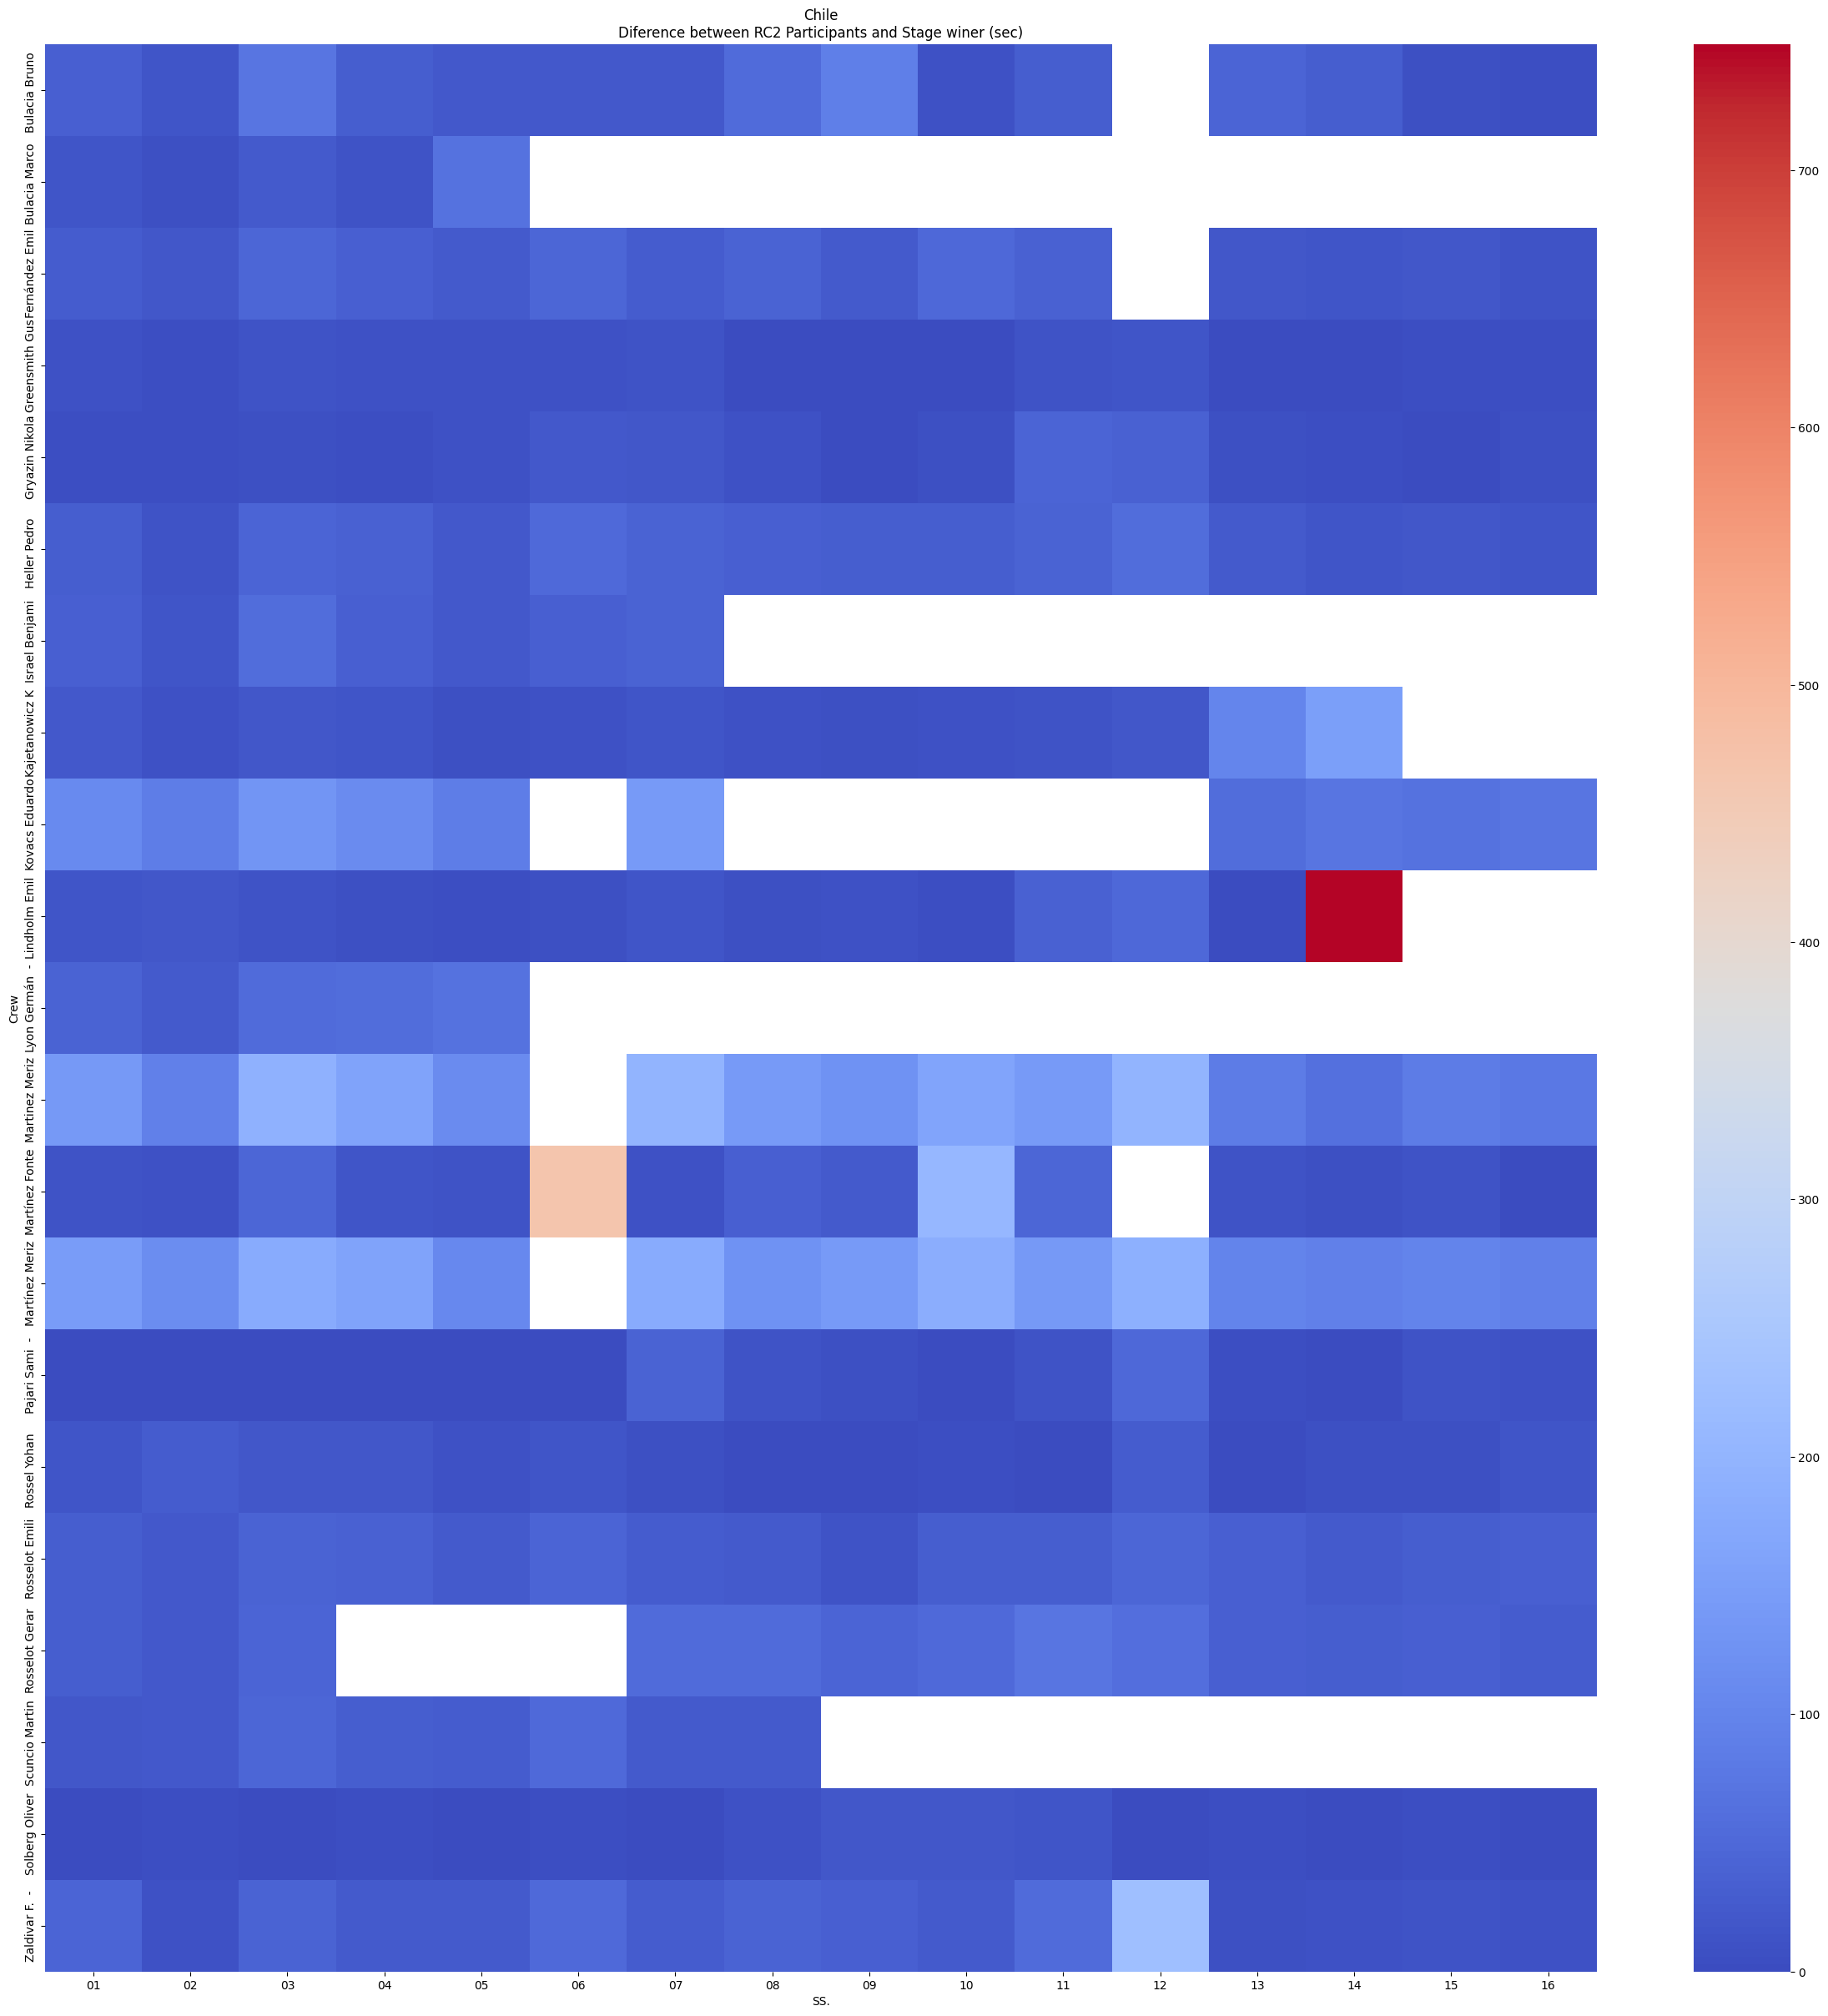

In [19]:
fig,ax = plt.subplots()
fig.set_size_inches(30,30)
Heatmap_ALL = sns.heatmap(ss_times_F4, cmap='coolwarm')
plt.title(rallyname+'\nDiference between '+ Group + ' Participants and Stage winer (sec)')
#plt.savefig("Heatmap_" + Group + ".png")
plt.show()

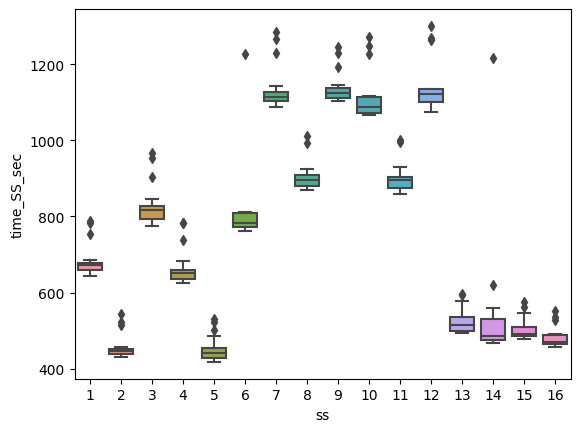

In [20]:
bplt=sns.boxplot( y=ss_times_WRC["time_SS_sec"], x=ss_times_WRC["ss"])
#plt.savefig("Boxplot_" + Group + ".png")

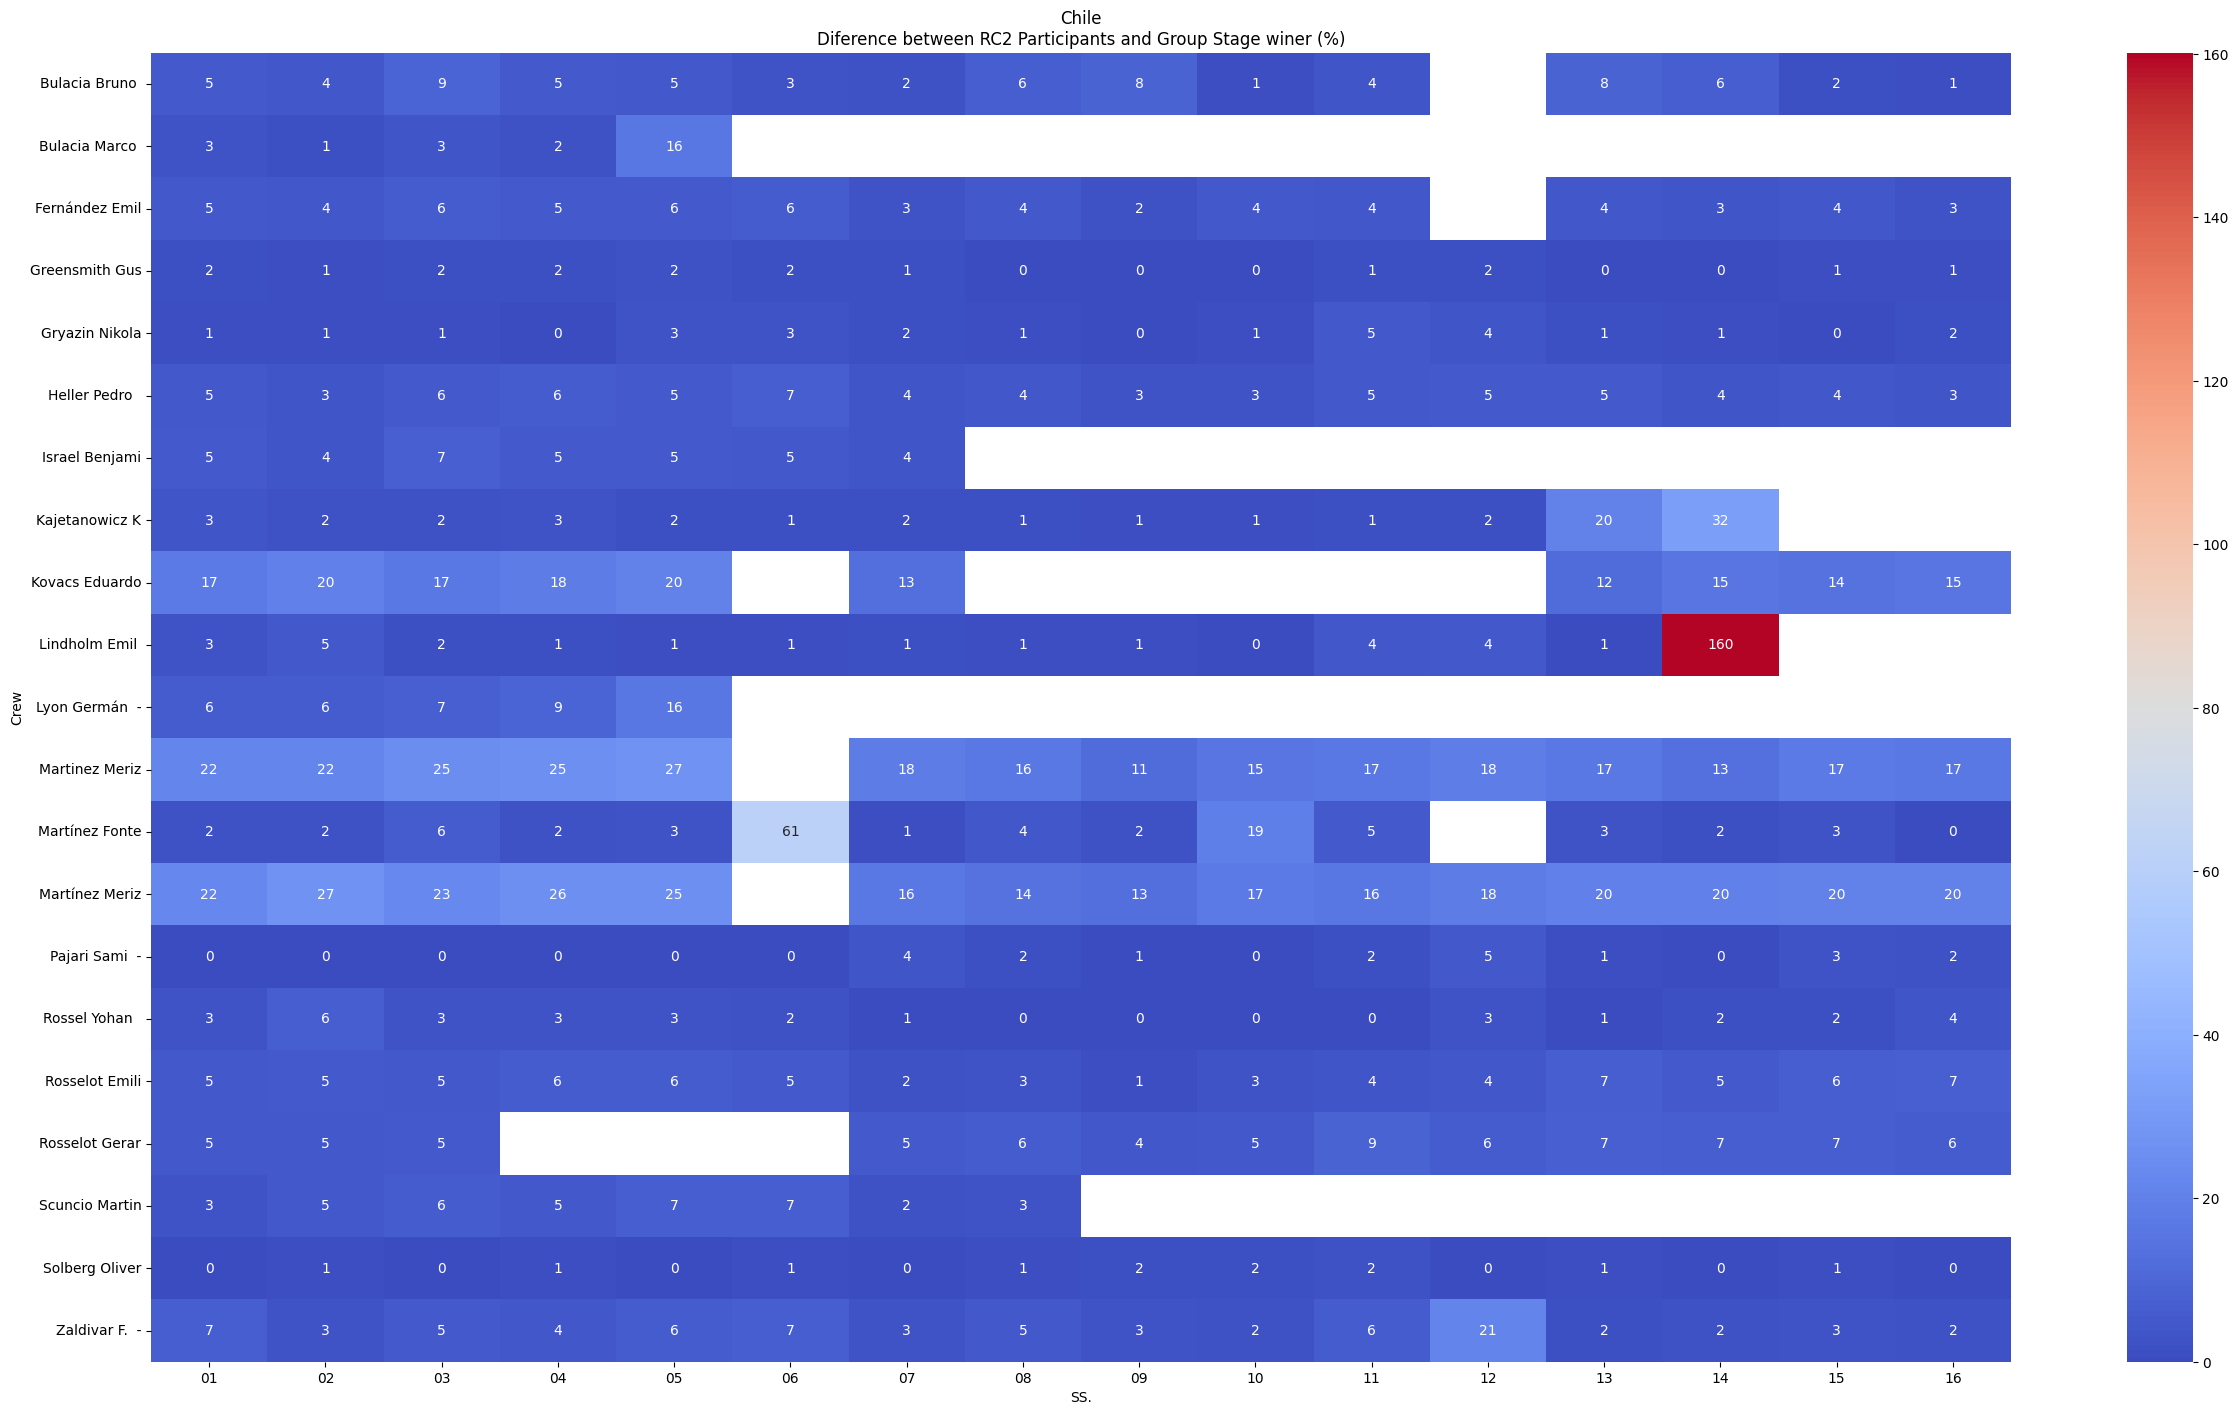

In [21]:
#ss_times_F3
fig,ax = plt.subplots()
fig.set_size_inches(30,17)
ss_timesa = pd.pivot_table(ss_times_F3, values='diff_G%', index='Crew', columns=['SS.'])
Heatmap_ = sns.heatmap(ss_timesa, annot=True, fmt=',.0f', cmap='coolwarm')
plt.title(rallyname +'\nDiference between ' + Group + ' Participants and Group Stage winer (%)')
#plt.savefig(rallyname + Group + ".jpg")
plt.show()